# Building CNN with Fashion MNIST data set

# IMPORTING TENSORFLOW

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.models import Model

# Loading Fashion_mnist data set

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# Dividing the dataset into train and test set

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Scaling the train and test data set

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
x_train.shape 

(60000, 28, 28)

In [7]:
# Convolution expects NxHxWxC
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
# Number of classes

K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [9]:
x_train.shape

(60000, 28, 28, 1)

# Model Building

In [10]:
# Build the model using the Functional API

i = Input(shape= x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compiling the model

In [11]:
# Compile and fit

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

# Data augmentation is performed to avoid overfitting and improve the accuracy.

In [12]:

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
# Training the model
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
1875/1875 [==============================] - 34s 17ms/step - loss: 0.6799 - accuracy: 0.7456 - val_loss: 0.5203 - val_accuracy: 0.8000
Epoch 2/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5188 - accuracy: 0.8045 - val_loss: 0.4814 - val_accuracy: 0.8113
Epoch 3/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4747 - accuracy: 0.8207 - val_loss: 0.4233 - val_accuracy: 0.8442
Epoch 4/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4416 - accuracy: 0.8349 - val_loss: 0.3805 - val_accuracy: 0.8608
Epoch 5/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4273 - accuracy: 0.8407 - val_loss: 0.3944 - val_accuracy: 0.8519
Epoch 6/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4085 - accuracy: 0.8476 - val_loss: 0.4193 - val_accuracy: 0.8392
Epoch 7/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3993 - accuracy: 0.8515 - val_loss: 0.3932 -

Model is not overfitting .Overfitting problem is fixed

# Plotting the loss per iteration

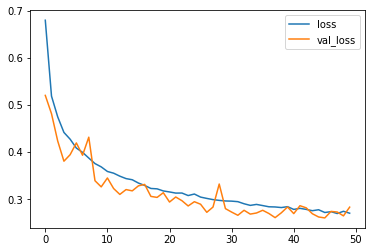

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plotting the accuracy per iteration

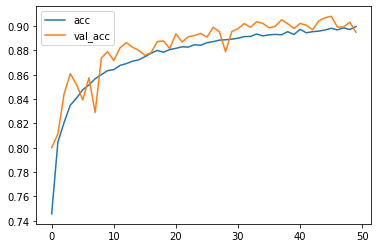

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()